In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [5]:
covidUS= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df = pd.read_csv(covidUS)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,804
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,221,221,221,236,241,242,242,242,266,301


In [3]:
df.shape

(253, 194)

## Drop the useless columns

In [7]:
dropcol= ['Province/State', 'Lat', 'Long']
df.drop(dropcol, axis =1, inplace = True)
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389
1,Albania,0,0,0,0,0,0,0,0,0,...,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830
2,Algeria,0,0,0,0,0,0,0,0,0,...,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592
3,Andorra,0,0,0,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,804
4,Angola,0,0,0,0,0,0,0,0,0,...,221,221,221,236,241,242,242,242,266,301


In [8]:
df.shape

(253, 191)

## Aggregating the rows by the country

In [11]:
df_aggregated= df.groupby('Country/Region').sum()
df_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389
Albania,0,0,0,0,0,0,0,0,0,0,...,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830
Algeria,0,0,0,0,0,0,0,0,0,0,...,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592
Andorra,0,0,0,0,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,804
Angola,0,0,0,0,0,0,0,0,0,0,...,221,221,221,236,241,242,242,242,266,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1921,1932,1950,2720,2720,3282,3752,3752,3752,4833
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
Yemen,0,0,0,0,0,0,0,0,0,0,...,714,741,751,762,779,780,797,833,840,849


## Get top 10 countries by [7/29/20]

In [13]:
 pd.DataFrame(df_aggregated['7/29/20']).sort_values(by='7/29/20', ascending= False).head(10)

,7/29/20
Country/Region,
Brazil,1922802
US,1389425
India,1019735
Russia,619204
Chile,324557
Mexico,314538
South Africa,297967
Peru,280044
Iran,259116


## Visualizing data: Brazil, US, India

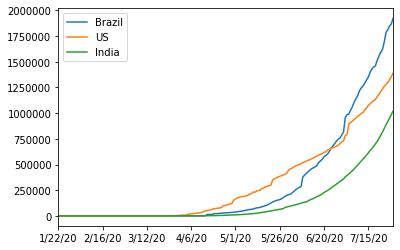

In [15]:
df_aggregated.loc['Brazil'].plot()
df_aggregated.loc['US'].plot()
df_aggregated.loc['India'].plot()
plt.legend()

## Calculating and plotting the first derivative of the curve

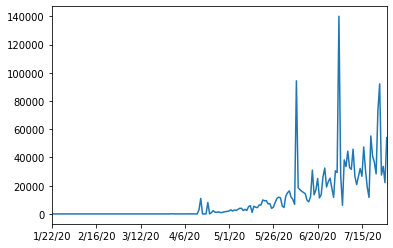

In [16]:
df_aggregated.loc['Brazil'].diff().plot()

In [20]:
df_aggregated.loc['Brazil'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
7/25/20    92145.0
7/26/20    27554.0
7/27/20    33728.0
7/28/20    22108.0
7/29/20    54053.0
Name: Brazil, Length: 190, dtype: float64

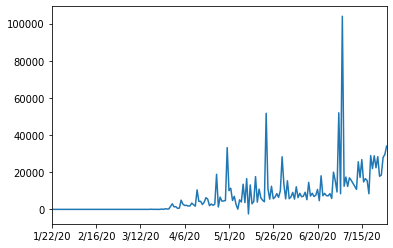

In [18]:
df_aggregated.loc['US'].diff().plot()

In [21]:
df_aggregated.loc['US'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
7/25/20    17790.0
7/26/20    18449.0
7/27/20    27941.0
7/28/20    29559.0
7/29/20    34062.0
Name: US, Length: 190, dtype: float64

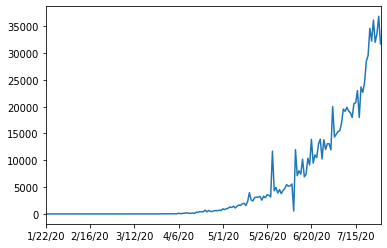

In [19]:
df_aggregated.loc['India'].diff().plot()

In [22]:
df_aggregated.loc['India'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
7/25/20    36141.0
7/26/20    31995.0
7/27/20    33598.0
7/28/20    36863.0
7/29/20    31706.0
Name: India, Length: 190, dtype: float64

In [23]:
df_aggregated.loc['Brazil'].diff().max()

140050.0

In [24]:
df_aggregated.loc['US'].diff().max()

103921.0

In [25]:
df_aggregated.loc['India'].diff().max()

36863.0